In [368]:
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import hvplot.pandas 
import hvplot as hv
import numpy as np
from sklearn.impute import SimpleImputer

import seaborn as sns


In [369]:
 machine_temp=Path('machine_temp_failure_missing.csv')#making timestamp as index column
 machine_tempdf = pd.read_csv(machine_temp, #reading missing values dataset
                     index_col='timestamp', 
                     parse_dates=True)
 machine_temp2=Path('machine_temp_failure_original.csv')
 machine_tempdf2 = pd.read_csv(machine_temp2, 
                     index_col='timestamp', 
                     parse_dates=True)

In [370]:

#find missing values
missing_rows = machine_tempdf[machine_tempdf.isnull().any(axis=1)]
print(missing_rows)
machine_tempdf.isna().sum()

                     value
timestamp                 
2013-10-12 00:25:00    NaN
2013-10-12 00:30:00    NaN
2013-10-12 00:35:00    NaN
2013-10-12 00:40:00    NaN
2013-10-12 00:45:00    NaN
...                    ...
2014-02-19 14:40:00    NaN
2014-02-19 14:45:00    NaN
2014-02-19 14:50:00    NaN
2014-02-19 14:55:00    NaN
2014-02-19 15:00:00    NaN

[1285 rows x 1 columns]


value    1285
dtype: int64

In [371]:
print(machine_tempdf.describe(include="all"))#Find mean , max ,min

              value
count  21410.000000
mean      85.968188
std       13.553070
min        2.084721
25%       83.082867
50%       89.251290
75%       93.910748
max      108.510543


In [372]:
machine_tempdf=machine_tempdf.rename(columns={'value':'temperature'})#Rename value column to temperature

In [373]:
delta_temp=[]
for i in range(len(machine_tempdf)):
    if i == (len(machine_tempdf)-1):
        delta_temp.append(0)  # For the last row, setting delta_temperature as 0
    else:
        # Calculate the difference between the current temperature and the next temperature
        diff = machine_tempdf['temperature'][i+1] - machine_tempdf['temperature'][i]
        delta_temp.append(diff)
machine_tempdf['delta_temperature']=delta_temp       


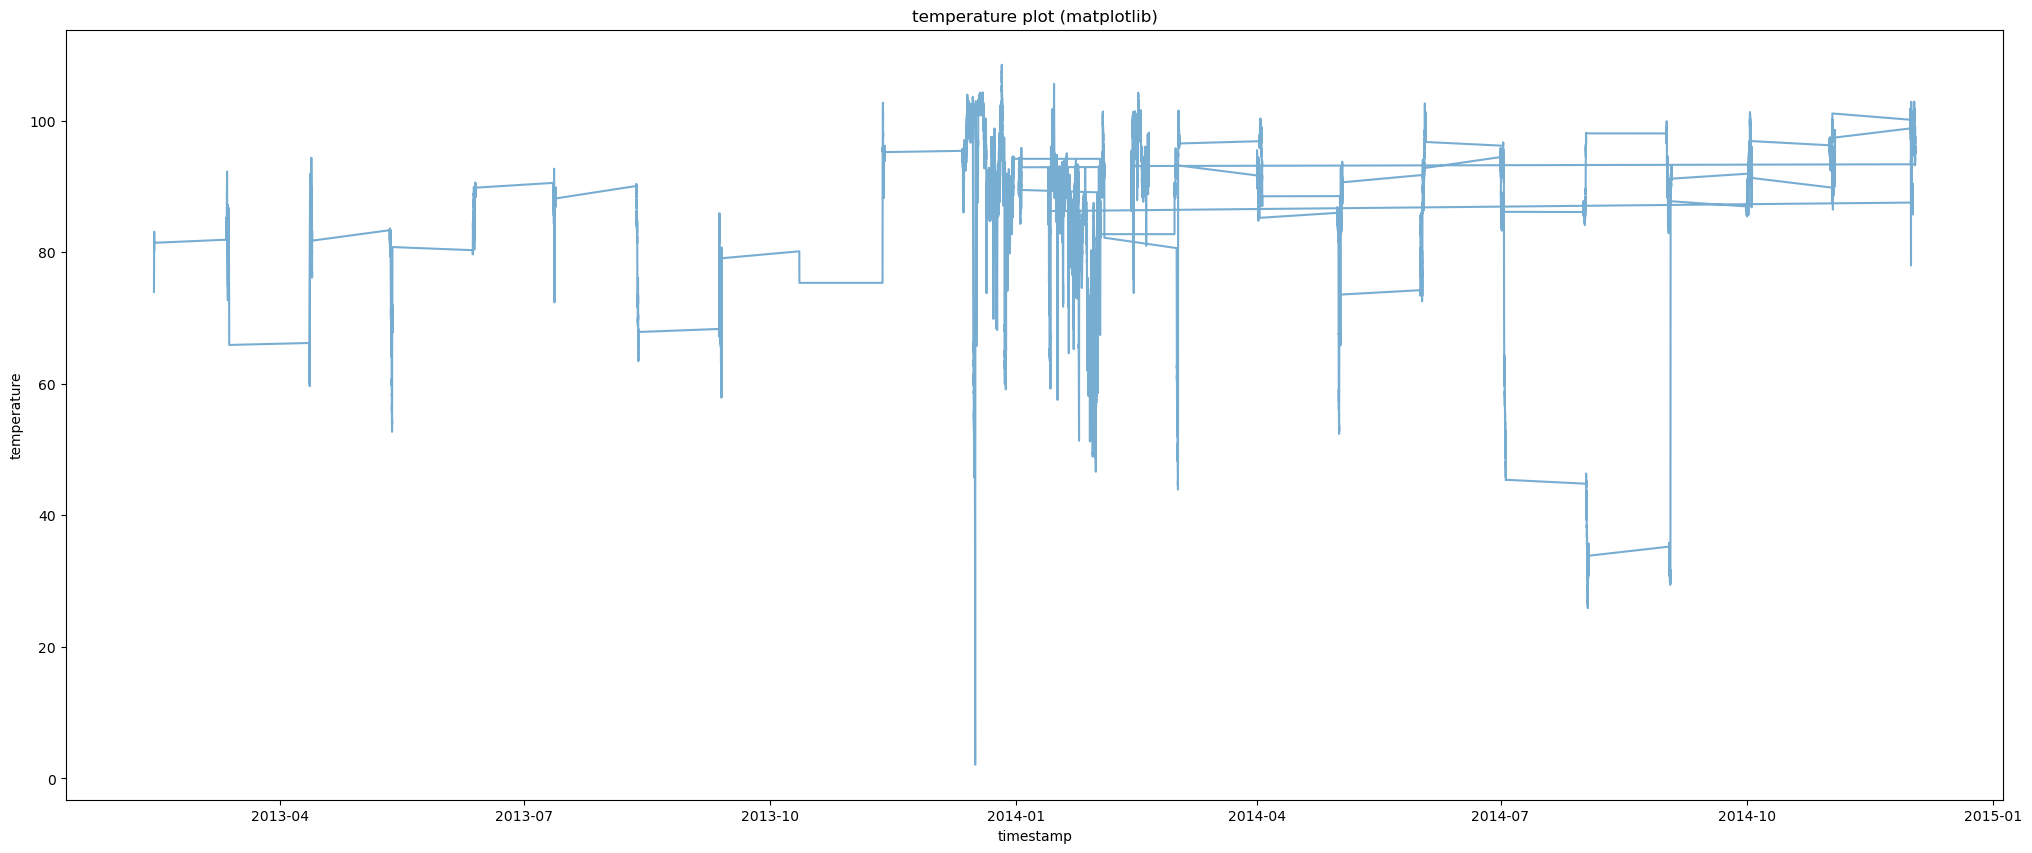

In [374]:
machine_tempdf['ffill1'] = machine_tempdf['temperature'].fillna(method='ffill')
plt.rcParams["figure.figsize"] = [25, 10]  
# Plot 'temperature' using matplotlib
plt.plot(machine_tempdf['ffill1'],alpha=0.6)
plt.xlabel('timestamp')
plt.ylabel('temperature')
plt.title('temperature plot (matplotlib)')
plt.show()

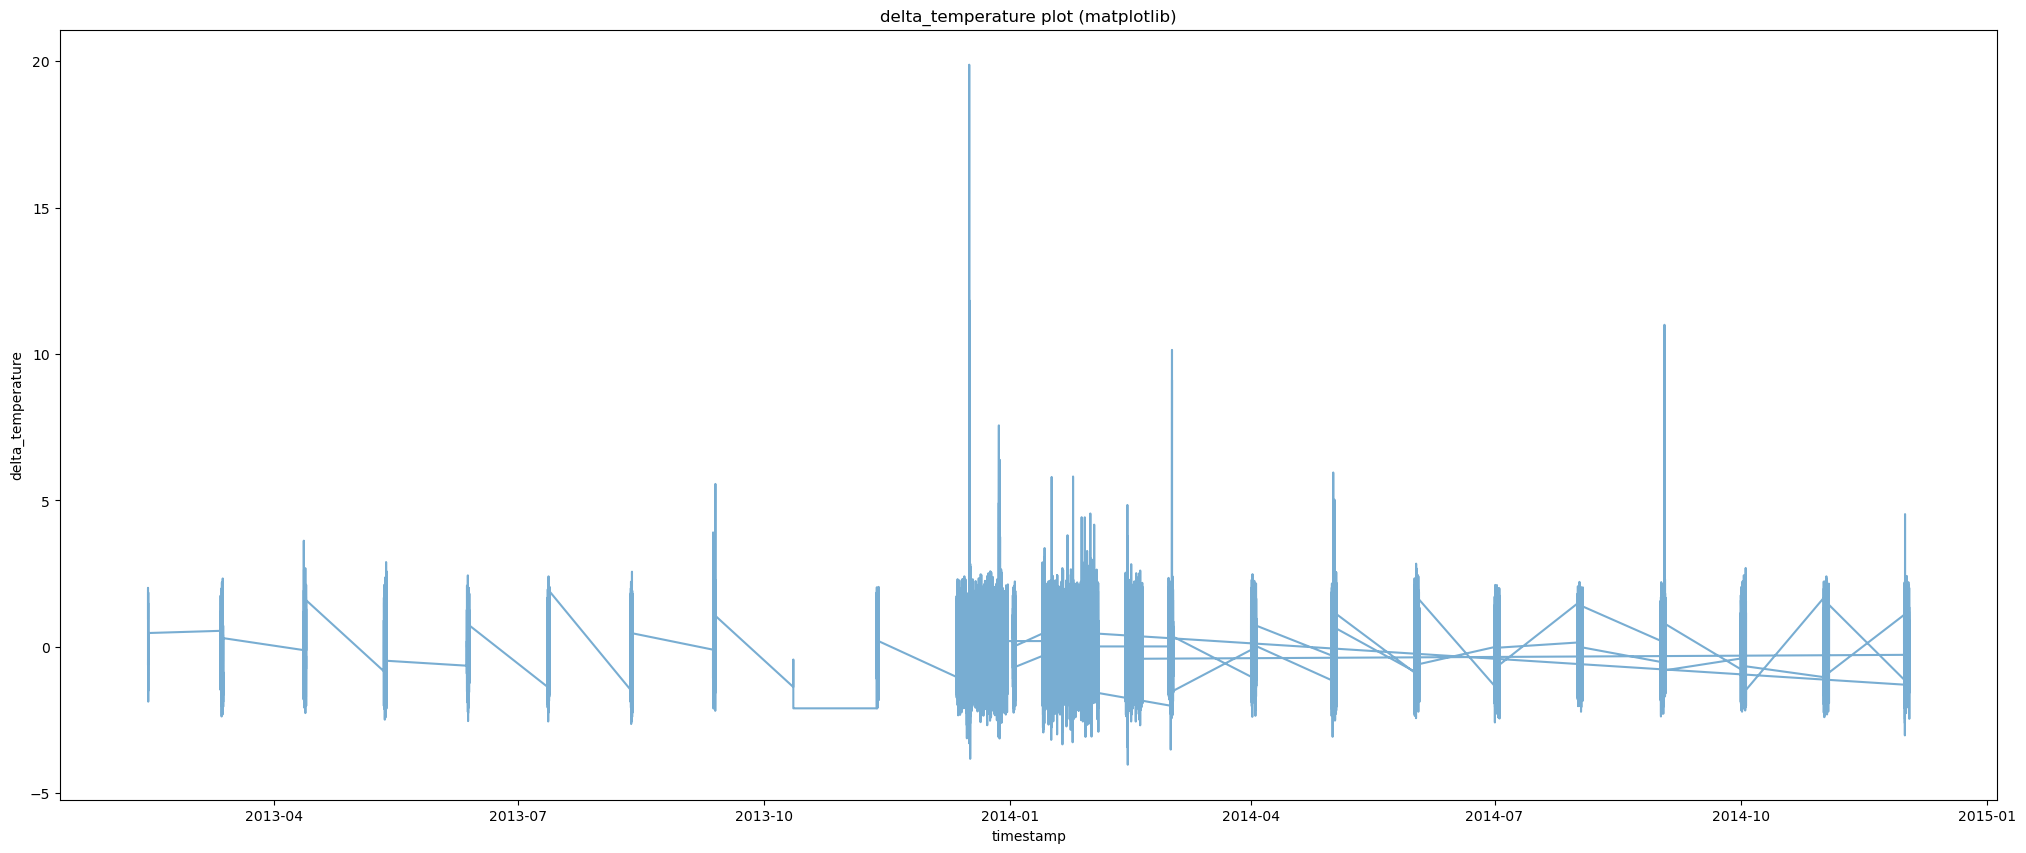

In [375]:
#Plot 'delta_temperature' using matplotlib
machine_tempdf['ffill2'] = machine_tempdf['delta_temperature'].fillna(method='ffill')
plt.plot(machine_tempdf['ffill2'],alpha=0.6)
plt.xlabel('timestamp')
plt.ylabel('delta_temperature')
plt.title('delta_temperature plot (matplotlib)')
plt.show()


In [376]:
#Plot 'temperature' using hvplot
plot1 = machine_tempdf['ffill1'].plot(backend='hvplot', 
                     title='temperature plot (matplotlib)')

 
plot1

:Curve   [timestamp]   (ffill1)

In [377]:
#Plot 'delta_temperature' using hvplot
plot2 = machine_tempdf['ffill2'].plot(backend='hvplot', 
                     title='delta_temperature plot (hvplot)')
plot2

:Curve   [timestamp]   (ffill2)

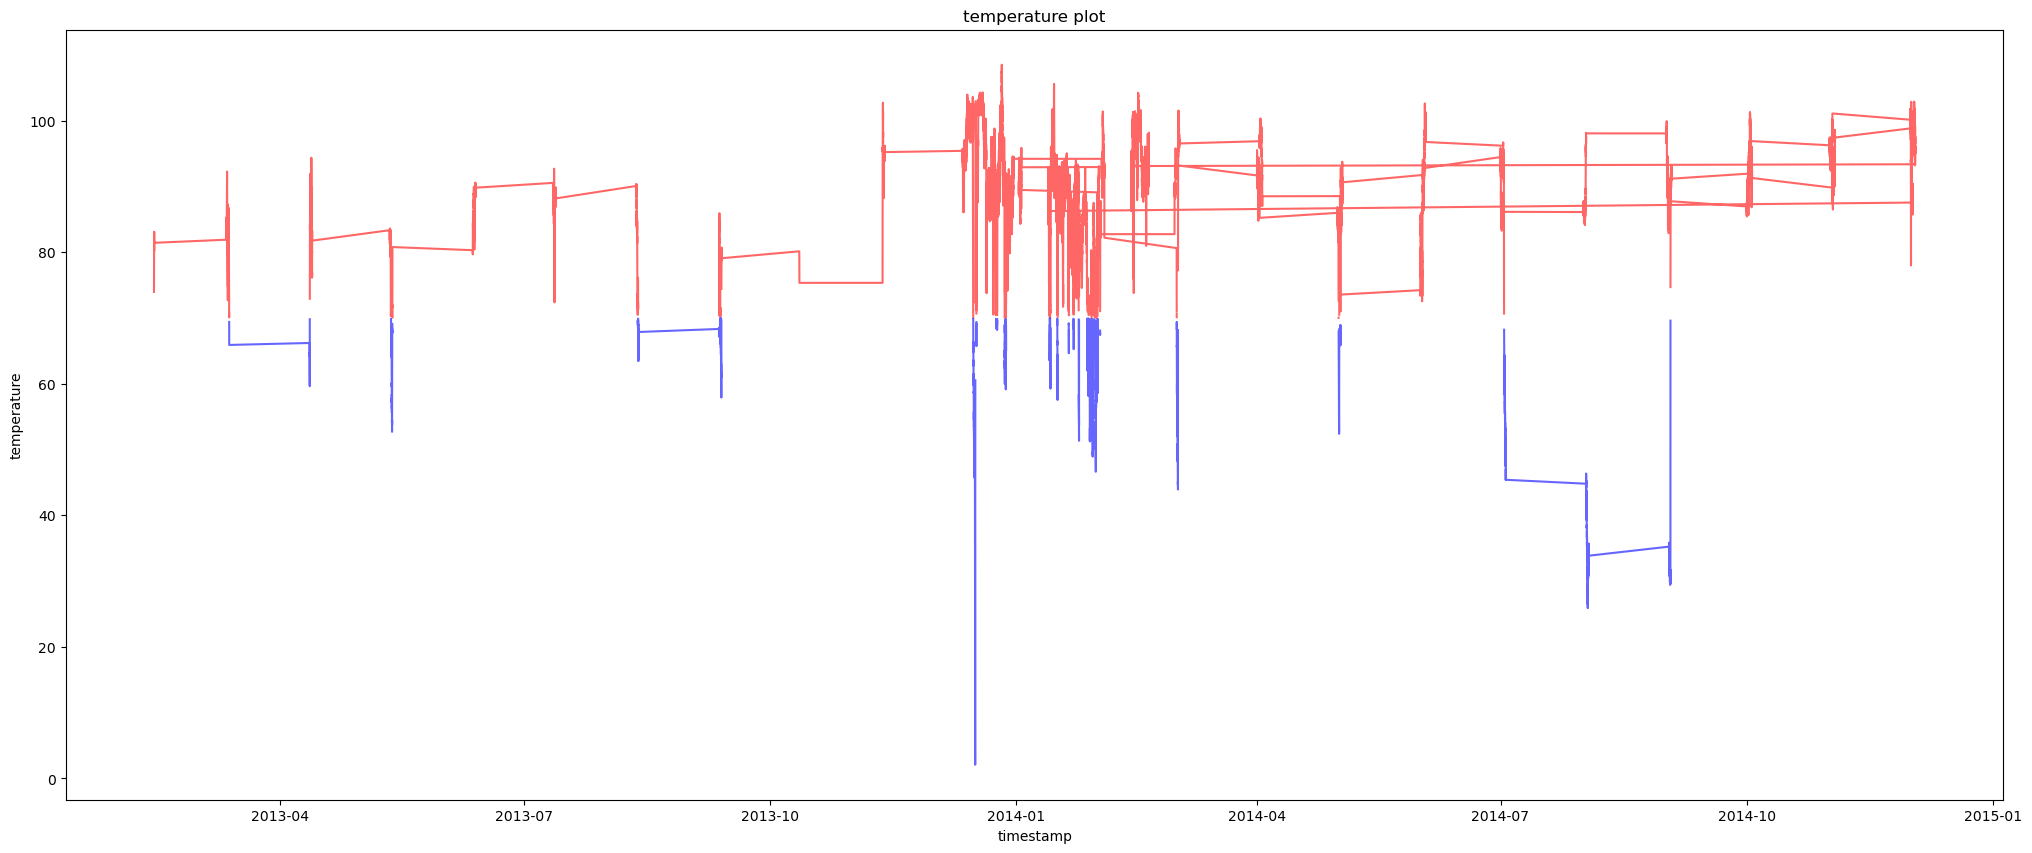

In [378]:
#Plot graph where temperature >70 is marked red and temperature<70 is marked blue
p1=machine_tempdf.ffill1.where(machine_tempdf.ffill1>70.00)

p2=machine_tempdf.ffill1.where(machine_tempdf.ffill1<70.00)

plt.plot(p1, color='r',alpha=0.6)# colour as red
plt.plot(p2, color='b',alpha=0.6)#colour as blue

plt.xlabel('timestamp')
plt.ylabel('temperature')
plt.title('temperature plot')
plt.show()

In [379]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [380]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


In [381]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [382]:

folder1=Path('machine_temp_failure_original.csv')
folder2=Path('machine_temp_failure_missing.csv')
machinetempfail_original = read_dataset(folder1, 'machine_temp_failure_original.csv', 'timestamp')
machinetempfail_missing  = read_dataset(folder2, 'machine_temp_failure_missing.csv', 'timestamp')
machinetempfail_original = machinetempfail_original.rename(columns={'value':'temperature'})
machinetempfail_missing = machinetempfail_missing.rename(columns={'value':'temperature'})

In [383]:
machinetempfail_missing['ffill'] = machinetempfail_missing['temperature'].fillna(method='ffill')#filling missing values
machinetempfail_missing['bfill'] = machinetempfail_missing['temperature'].fillna(method='bfill')
machinetempfail_missing['mean'] = machinetempfail_missing['temperature'].fillna(machinetempfail_missing['temperature'].mean())

In [384]:
rmse1 = rmse_score(machinetempfail_original,machinetempfail_missing,'temperature')



RMSE for ffill: 1.4666115658526897
RMSE for bfill: 5.538329974927277
RMSE for mean: 2.6118121108261114


In [385]:
folder1=Path('machine_temp_failure_original.csv')
folder2=Path('machine_temp_failure_missing.csv')
machinetempfail_original = read_dataset(folder1, 'machine_temp_failure_original.csv', 'timestamp')
machinetempfail_missing  = read_dataset(folder2, 'machine_temp_failure_missing.csv', 'timestamp')
machinetempfail_original = machinetempfail_original.rename(columns={'value':'temperature'})
machinetempfail_missing = machinetempfail_missing.rename(columns={'value':'temperature'})

In [386]:
strategy = [# filling missing values using SimpleImputer
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

machinetempfail_vals = machinetempfail_missing['temperature'].values.reshape(-1,1)




for s_name, s in strategy:
    machinetempfail_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(machinetempfail_vals))



c:\Users\Pranjali\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [387]:
rmse2 = rmse_score(machinetempfail_original,machinetempfail_missing,'temperature')

RMSE for Mean Strategy: 2.611812110826041
RMSE for Median Strategy: 2.0176725629240626
RMSE for Most Frequent Strategy: 22.936820075564288


In [388]:
folder1=Path('machine_temp_failure_original.csv')
folder2=Path('machine_temp_failure_missing.csv')
machinetempfail_original = read_dataset(folder1, 'machine_temp_failure_original.csv', 'timestamp')
machinetempfail_missing  = read_dataset(folder2, 'machine_temp_failure_missing.csv', 'timestamp')
machinetempfail_original = machinetempfail_original.rename(columns={'value':'temperature'})
machinetempfail_missing = machinetempfail_missing.rename(columns={'value':'temperature'})



In [389]:
interpolations = [  #filling missing values using Interpolation
    'linear',
    'quadratic',
    'nearest',
    'cubic'
]
duplicate_rows = machinetempfail_missing.index.duplicated()

# Remove duplicate rows from the DataFrame
machinetempfail_missing = machinetempfail_missing[~duplicate_rows]

for intp in interpolations:
    machinetempfail_missing[intp] = machinetempfail_missing['temperature'].interpolate(method=intp)
    


In [390]:




# Assuming 'machinetempfail_missing' is a pandas DataFrame with a datetime index
# Sort the DataFrame by the datetime index
machinetempfail_missing = machinetempfail_missing.sort_index()

machinetempfail_missing['spline'] = machinetempfail_missing['temperature'].interpolate(method=intp, order=3)

machinetempfail_missing['polynomial'] = machinetempfail_missing['temperature'].interpolate(method=intp,order=3)


In [391]:
rmse3 = rmse_score(machinetempfail_original,machinetempfail_missing,'temperature')

RMSE for linear: 3.4745265473020472
RMSE for quadratic: 13.078876205037748
RMSE for nearest: 2.2136803493321584
RMSE for cubic: 16.26476919770462
RMSE for spline: 16.26476919770462
RMSE for polynomial: 16.26476919770462


The method with least RMSE score is ffill()

In [392]:
folder1=Path('machine_temp_failure_original.csv')
folder2=Path('machine_temp_failure_missing.csv')
machinetempfail_original = read_dataset(folder1, 'machine_temp_failure_original.csv', 'timestamp')
machinetempfail_missing  = read_dataset(folder2, 'machine_temp_failure_missing.csv', 'timestamp')
machinetempfail_original = machinetempfail_original.rename(columns={'value':'temperature'})
machinetempfail_missing = machinetempfail_missing.rename(columns={'value':'temperature'})

machinetempres=machinetempfail_original.resample('H').mean()



AxesSubplot(0.125,0.11;0.775x0.77)


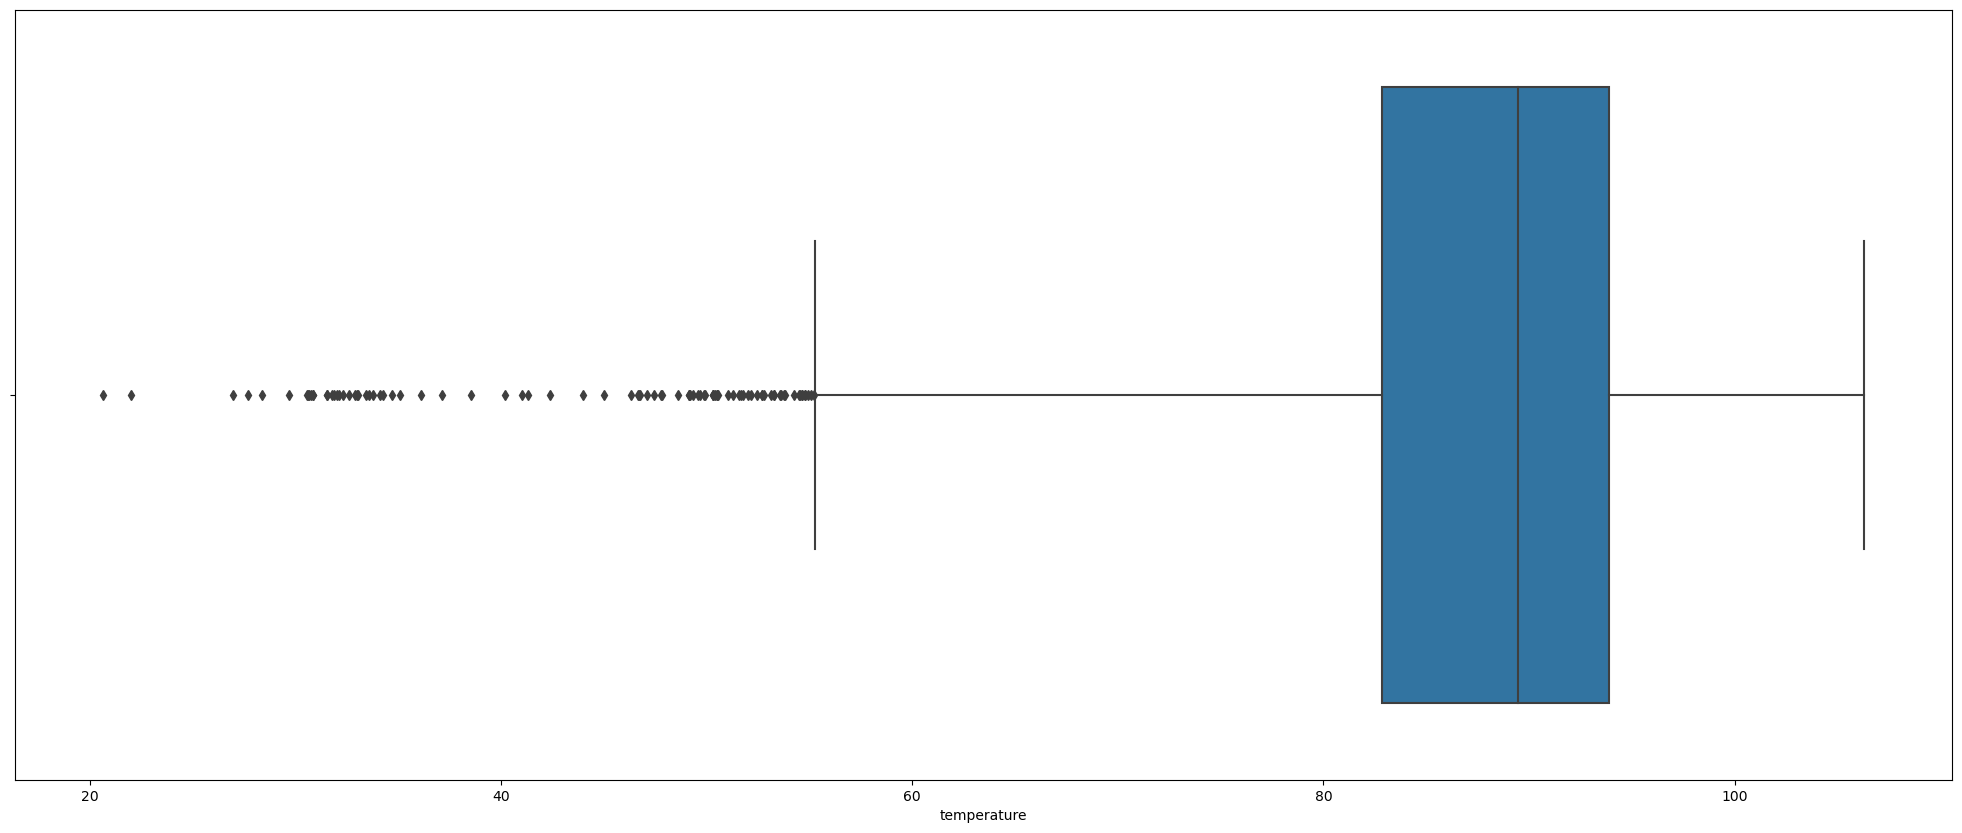

In [400]:
print(sns.boxplot(x=machinetempres['temperature'], whis=2.5))#print box plot

AxesSubplot(0.125,0.11;0.775x0.77)


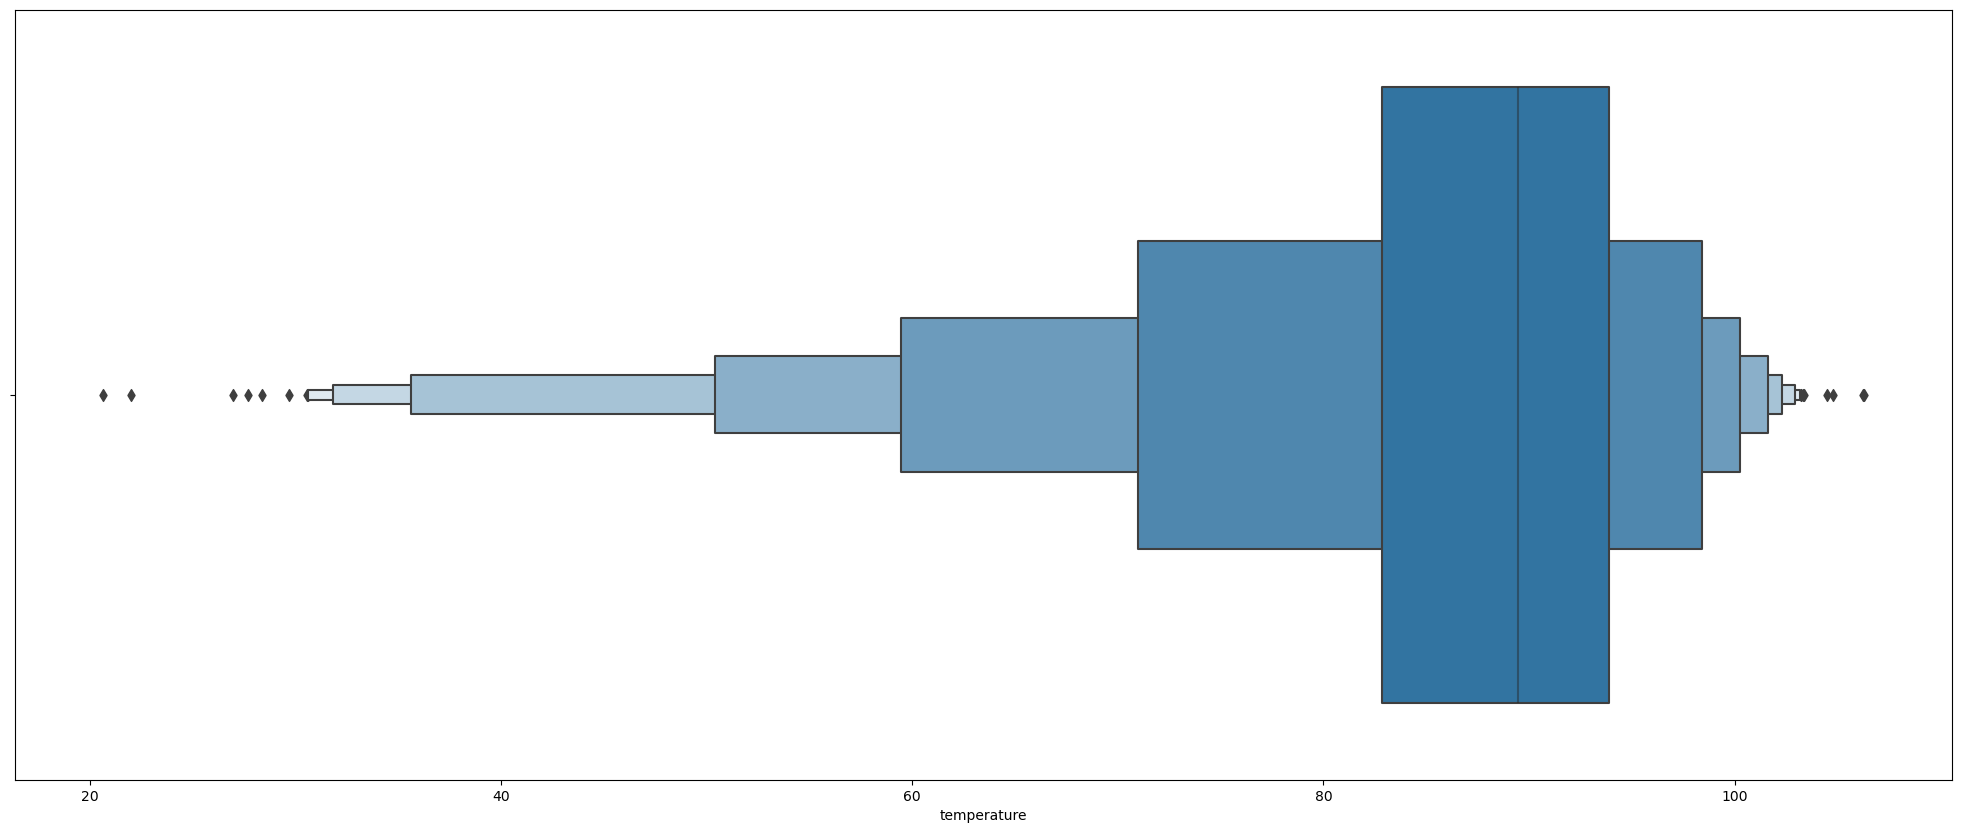

In [394]:
print (sns.boxenplot(x=machinetempres['temperature'],k_depth='tukey'))#print boxen plot

AxesSubplot(0.125,0.11;0.775x0.77)


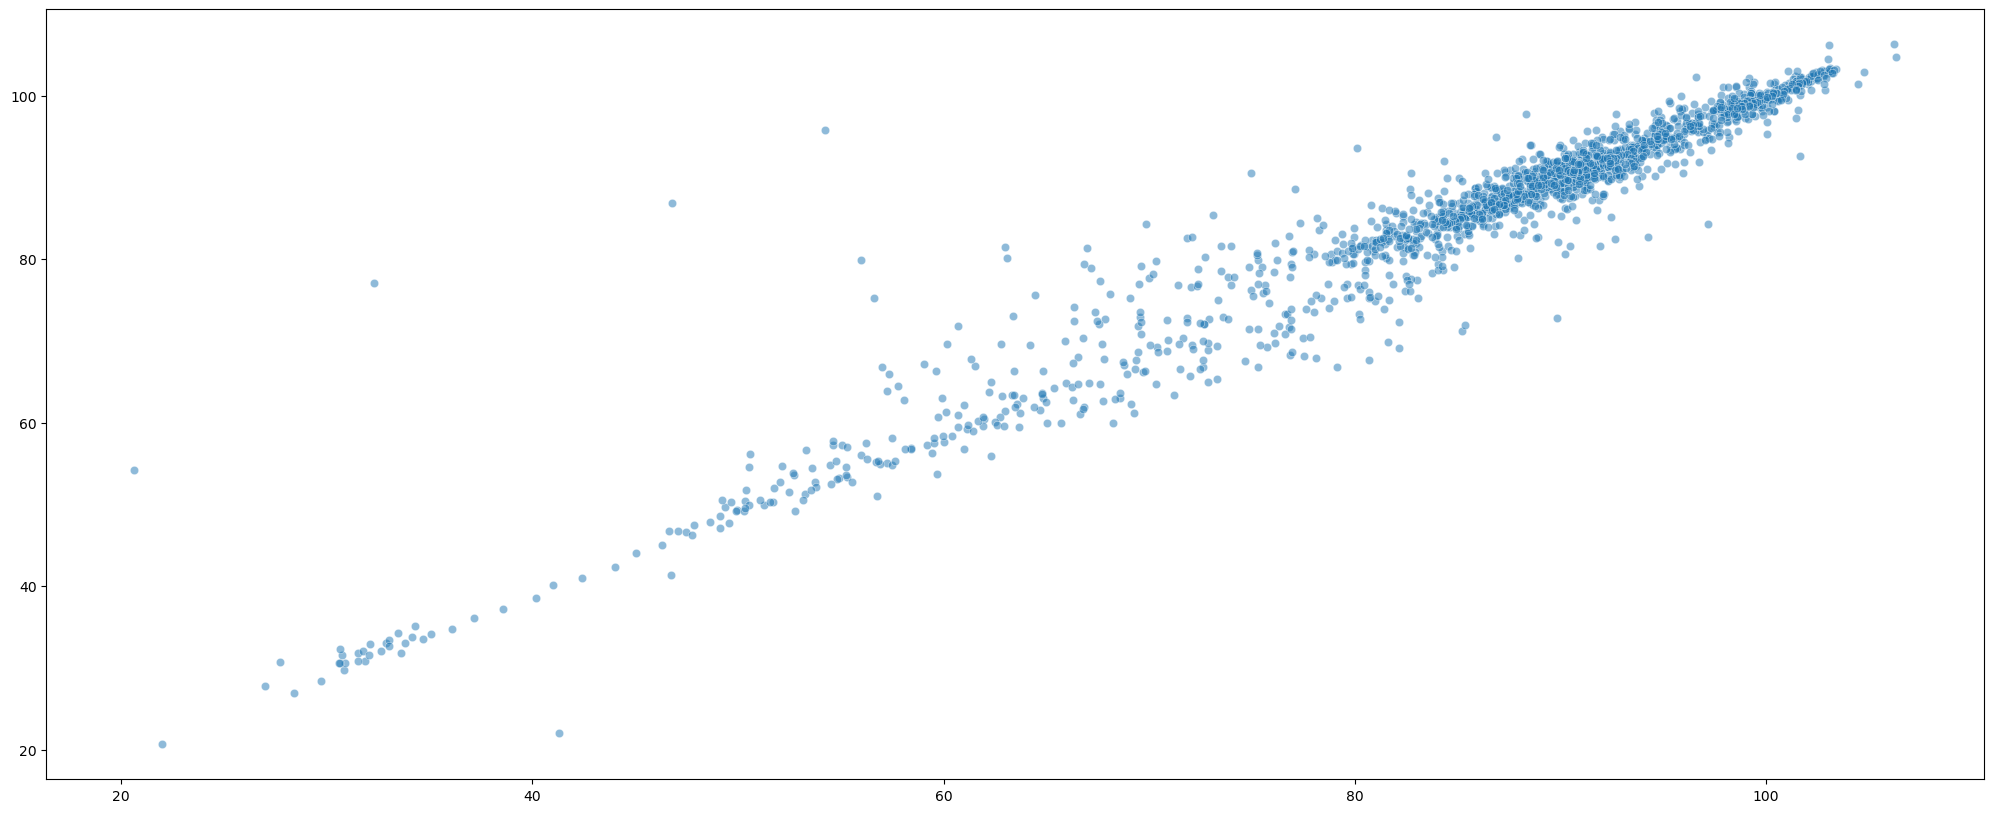

In [395]:
#print lag plot
y = machinetempres['temperature'][1:].values.reshape(-1)
x = machinetempres['temperature'][:-1].values.reshape(-1)
print(sns.scatterplot(x=x, y=y,alpha=0.5))

In [396]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data['temperature'], [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (2.5 * IQR)
    upper_fence = q3 + (2.5 * IQR)
    return data[(data['temperature'] > upper_fence) | (data['temperature'] < lower_fence)]



In [397]:
outliers = iqr_outliers(machinetempres)#print outliers
print(outliers)

                     temperature
timestamp                       
2013-12-05 19:00:00    55.057879
2013-12-10 06:00:00    54.930578
2013-12-10 07:00:00    53.261878
2013-12-10 08:00:00    51.264934
2013-12-10 09:00:00    49.925316
...                          ...
2014-02-09 07:00:00    30.880488
2014-02-09 08:00:00    30.632596
2014-02-09 09:00:00    30.583324
2014-02-09 10:00:00    30.641056
2014-02-09 11:00:00    32.311358

[91 rows x 1 columns]


In [399]:

sorted_outliers = outliers.sort_values(by='temperature')

print(sorted_outliers)

                     temperature
timestamp                       
2013-12-16 17:00:00    20.641281
2013-12-16 16:00:00    22.004861
2014-02-08 14:00:00    26.971556
2014-02-08 15:00:00    27.713841
2014-02-08 13:00:00    28.383913
...                          ...
2013-12-10 19:00:00    54.784384
2013-12-16 05:00:00    54.795375
2013-12-10 06:00:00    54.930578
2013-12-05 19:00:00    55.057879
2014-02-03 05:00:00    55.231263

[91 rows x 1 columns]


The outliers are all temperature values greater than 20 but less than 55.

In [ ]:

def zscore(df, degree=3):#find Z score
    data = df.copy()
    data['zscore'] = (data - data.mean())/data.std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    
    return outliers['temperature'], data




In [ ]:

threshold = 2.5

outliers, transformed = zscore(machinetempres, threshold)

In [ ]:
def plot_zscore(data, d=3):#plot Z score
    n = len(data)
    plt.figure(figsize=(8,8))
    plt.plot(data,'k^')
    plt.plot([0,n],[d,d],'r--')
    plt.plot([0,n],[-d,-d],'r--')

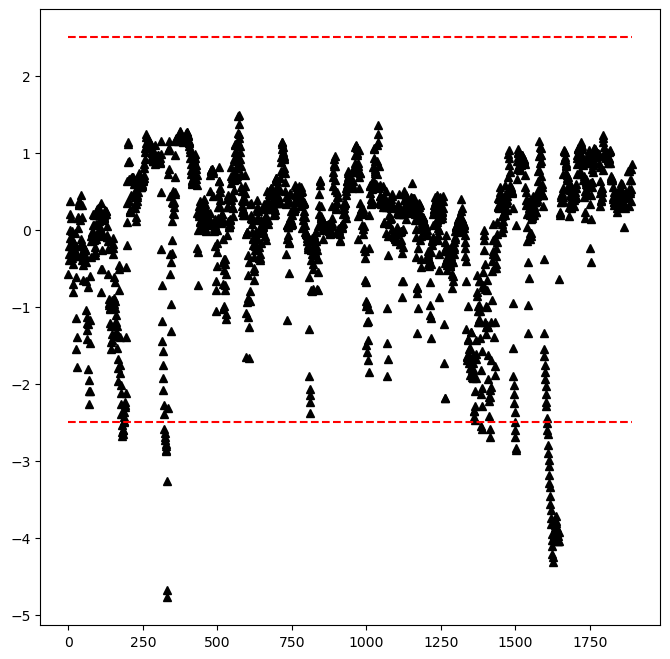

In [ ]:
data = transformed['zscore'].values
plot_zscore(data, d=2.5)